
# Train BiLSTM Model from WavLM features and continuous labels

### For Recola 2018 Train and Devel dataset

##### https://github.com/microsoft/unilm/tree/master/wavlm
##### https://github.com/audeering/w2v2-how-to/blob/main/notebook.ipynb

In [1]:
import pandas as pd
import numpy as np
import os

### Process Feature Files - Train and Devel

In [2]:
# Path to feature files
path_train = 'Recola2018_16k/features/train'
extension = 'wavlmbasefeatpool'

train_files = [file for file in os.listdir(path_train) if file.endswith(extension)]

sorted_train_files = sorted(train_files)
sorted_train_files

['train_1.wavlmbasefeatpool',
 'train_2.wavlmbasefeatpool',
 'train_3.wavlmbasefeatpool',
 'train_4.wavlmbasefeatpool',
 'train_5.wavlmbasefeatpool',
 'train_6.wavlmbasefeatpool',
 'train_7.wavlmbasefeatpool',
 'train_8.wavlmbasefeatpool',
 'train_9.wavlmbasefeatpool']

In [3]:
# Path to feature files
path_devel = 'Recola2018_16k/features/devel'
extension = 'wavlmbasefeatpool'

devel_files = [file for file in os.listdir(path_devel) if file.endswith(extension)]

sorted_devel_files = sorted(devel_files)
sorted_devel_files

['dev_1.wavlmbasefeatpool',
 'dev_2.wavlmbasefeatpool',
 'dev_3.wavlmbasefeatpool',
 'dev_4.wavlmbasefeatpool',
 'dev_5.wavlmbasefeatpool',
 'dev_6.wavlmbasefeatpool',
 'dev_7.wavlmbasefeatpool',
 'dev_8.wavlmbasefeatpool',
 'dev_9.wavlmbasefeatpool']

In [4]:
dfs = []
for file in sorted_train_files:
    df = pd.read_csv(os.path.join(path_train, file))
    
    # pad to make single feature files compatible with labels (2 lines for Recola)
    # pad the dataframe with a copy of the first row 
    new_row = pd.DataFrame(df.loc[0])

    # simply concatenate both dataframes
    df = pd.concat([new_row.T, df]).reset_index(drop = True)
    
    # pad the dataframe with a copy of the last row 
    new_row2 = pd.DataFrame(df.loc[len(df)-1])
    
    # simply concatenate both dataframes
    df = pd.concat([df,new_row2.T]).reset_index(drop = True)
    
    dfs.append(df)

df_train_feat = pd.concat(dfs, ignore_index=True)

# Drop first index column (unamed 0)
df_train_feat.drop(df_train_feat.columns[[0]], axis=1, inplace=True)

df_train_feat

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.287043,0.052053,-0.020140,-0.083973,-0.002710,-0.094455,-0.007519,-0.009715,0.070949,0.002657,...,0.036992,0.161464,0.085316,1.000897,0.171399,-0.057759,0.070285,0.126770,0.106141,0.604056
1,0.287043,0.052053,-0.020140,-0.083973,-0.002710,-0.094455,-0.007519,-0.009715,0.070949,0.002657,...,0.036992,0.161464,0.085316,1.000897,0.171399,-0.057759,0.070285,0.126770,0.106141,0.604056
2,0.280631,0.019296,0.017815,-0.069037,0.012871,-0.100985,-0.062013,-0.022290,0.163397,0.107826,...,-0.007101,0.155485,0.105061,1.245534,0.198035,-0.073335,0.138528,0.108111,0.125935,0.659750
3,0.260988,0.026328,0.004951,-0.050089,0.034633,-0.091831,-0.089229,0.035907,0.183416,0.153492,...,-0.017694,0.157349,0.090947,1.277041,0.187295,-0.067804,0.121619,0.098807,0.129719,0.632740
4,0.189641,-0.038102,0.029187,-0.070187,0.016132,-0.096568,-0.152244,0.066400,0.259290,0.179177,...,-0.046208,0.147277,0.131058,1.139375,0.224708,-0.035480,0.102886,0.097665,0.096764,0.771372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67504,-0.045178,-0.107187,-0.060478,-0.050455,0.103593,-0.024292,0.108691,-0.019609,0.062754,0.121068,...,0.114766,-0.022182,-0.069816,1.633942,0.077471,0.010737,0.006188,-0.053560,-0.038820,0.154500
67505,-0.073346,0.025955,-0.132923,-0.077584,-0.009768,-0.083074,0.157465,0.018694,0.025926,-0.033569,...,0.022912,0.038415,0.141481,0.543510,0.010589,-0.040598,0.063158,-0.046928,-0.080123,0.323969
67506,-0.139441,0.021400,-0.115456,-0.085402,0.064270,0.068080,-0.064101,0.057752,-0.024166,-0.186699,...,-0.126446,0.007706,0.155883,-0.359285,-0.089562,0.034612,0.043575,-0.095033,-0.040739,-0.449713
67507,0.038998,0.134190,-0.185722,0.006425,0.049627,0.023687,0.110960,-0.046366,-0.000005,-0.155214,...,-0.158967,-0.133261,0.085344,-0.566554,-0.268961,0.049534,0.080955,-0.120617,-0.139615,1.417126


In [5]:
dfs_devel = []
for file in sorted_devel_files:
    df_devel = pd.read_csv(os.path.join(path_devel, file))
    
    # pad to make single feature files compatible with labels (2 lines for Recola)
    # pad the dataframe with a copy of the first row 
    new_row = pd.DataFrame(df_devel.loc[0])

    # simply concatenate both dataframes
    df_devel = pd.concat([new_row.T, df_devel]).reset_index(drop = True)
    
    # pad the dataframe with a copy of the last row 
    new_row2 = pd.DataFrame(df_devel.loc[len(df_devel)-1])
    
    # simply concatenate both dataframes
    df_devel = pd.concat([df_devel,new_row2.T]).reset_index(drop = True)
    
    dfs_devel.append(df_devel)
    
df_devel_feat = pd.concat(dfs_devel, ignore_index=True)

# Drop first index column (unamed 0)
df_devel_feat.drop(df_devel_feat.columns[[0]], axis=1, inplace=True)

df_devel_feat

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.238646,0.084087,0.028877,-0.078474,0.056739,-0.089691,-0.043330,-0.089900,0.143496,0.042189,...,0.024183,0.171355,0.065592,1.195989,0.187410,-0.076942,0.015578,0.144548,0.005386,0.410032
1,0.238646,0.084087,0.028877,-0.078474,0.056739,-0.089691,-0.043330,-0.089900,0.143496,0.042189,...,0.024183,0.171355,0.065592,1.195989,0.187410,-0.076942,0.015578,0.144548,0.005386,0.410032
2,0.211931,0.098341,0.085483,-0.053753,0.074008,-0.100904,-0.122589,-0.055923,0.208470,0.121186,...,-0.012240,0.181948,0.056408,1.558745,0.203114,-0.066169,0.058576,0.134333,0.045732,0.441429
3,0.182068,0.094378,0.092790,-0.030379,0.080415,-0.084567,-0.184084,0.025038,0.210229,0.144886,...,-0.021612,0.188633,0.042378,1.630740,0.198598,-0.073841,0.063514,0.116755,0.097646,0.539371
4,0.143341,0.090180,0.100481,-0.005192,0.079638,-0.048728,-0.247517,0.050838,0.230621,0.168228,...,-0.060984,0.153103,0.048501,1.723943,0.192285,-0.062105,0.064657,0.093853,0.082103,0.322427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67504,0.027904,0.119710,-0.136735,0.146773,-0.058715,0.039445,-0.056512,0.097811,-0.004972,0.019265,...,-0.078433,0.168866,0.331171,-0.631903,0.108821,0.003798,0.199048,-0.060948,0.073858,-0.049378
67505,0.081144,0.111192,-0.125331,0.118674,-0.048430,0.009312,-0.019351,0.108096,-0.021916,0.025030,...,-0.088513,0.188372,0.315841,-0.553180,0.106020,-0.054775,0.146062,-0.041599,0.074856,-0.050413
67506,0.175888,0.126636,-0.106341,0.131696,-0.035300,-0.013077,0.053262,0.116018,-0.030520,0.024510,...,-0.061279,0.164236,0.237918,-0.243618,0.093962,-0.069607,0.073311,-0.036209,0.051816,-0.233181
67507,0.131737,0.131993,-0.142118,0.070340,-0.062115,0.045281,0.008546,-0.028331,-0.080437,-0.036034,...,-0.095634,0.033959,0.279375,-0.433096,0.063023,-0.052571,-0.034168,-0.029573,0.026302,0.016111


### Process label files - Train and Devel

In [6]:
# Path to label files
path_train_arousal_labels = 'Recola2018_16k/labels/arousal/Train/'
extension = 'arff'

train_files_arousal_labels = [file for file in os.listdir(path_train_arousal_labels) if file.endswith(extension)]

sorted_train_arousal_labels = sorted(train_files_arousal_labels)
sorted_train_arousal_labels

['train_1.arff',
 'train_2.arff',
 'train_3.arff',
 'train_4.arff',
 'train_5.arff',
 'train_6.arff',
 'train_7.arff',
 'train_8.arff',
 'train_9.arff']

In [7]:
# Path to label files
path_train_valence_labels = 'Recola2018_16k/labels/valence/Train/'
extension = 'arff'

train_files_valence_labels = [file for file in os.listdir(path_train_valence_labels) if file.endswith(extension)]

sorted_train_valence_labels = sorted(train_files_valence_labels)
sorted_train_valence_labels

['train_1.arff',
 'train_2.arff',
 'train_3.arff',
 'train_4.arff',
 'train_5.arff',
 'train_6.arff',
 'train_7.arff',
 'train_8.arff',
 'train_9.arff']

In [8]:
# Path to label files
path_devel_arousal_labels = 'Recola2018_16k/labels/arousal/Devel/'
extension = 'arff'

devel_files_arousal_labels = [file for file in os.listdir(path_devel_arousal_labels) if file.endswith(extension)]

sorted_devel_arousal_labels = sorted(devel_files_arousal_labels)
sorted_devel_arousal_labels

['dev_1.arff',
 'dev_2.arff',
 'dev_3.arff',
 'dev_4.arff',
 'dev_5.arff',
 'dev_6.arff',
 'dev_7.arff',
 'dev_8.arff',
 'dev_9.arff']

In [9]:
# Path to label files
path_devel_valence_labels = 'Recola2018_16k/labels/valence/Devel/'
extension = 'arff'

devel_files_valence_labels = [file for file in os.listdir(path_devel_valence_labels) if file.endswith(extension)]

sorted_devel_valence_labels = sorted(devel_files_valence_labels)
sorted_devel_valence_labels

['dev_1.arff',
 'dev_2.arff',
 'dev_3.arff',
 'dev_4.arff',
 'dev_5.arff',
 'dev_6.arff',
 'dev_7.arff',
 'dev_8.arff',
 'dev_9.arff']

In [10]:
dfl = []
for file in sorted_train_arousal_labels:
    df2 = pd.read_csv(os.path.join(path_train_arousal_labels, file), sep=",", header=None)
    df2.drop(df2.columns[[0,1]], axis=1, inplace=True)
    dfl.append(df2)

df_train_arousal_lab = pd.concat(dfl, ignore_index=True)
df_train_arousal_lab = df_train_arousal_lab.rename(columns={2:"arousal"})
df_train_arousal_lab

,arousal
0,-0.019902
1,-0.019902
2,-0.019902
3,-0.019902
4,-0.019902
...,...
67504,0.161519
67505,0.159852
67506,0.156519
67507,0.153186


In [11]:
dfl = []
for file in sorted_train_valence_labels:
    df2 = pd.read_csv(os.path.join(path_train_valence_labels, file), sep=",", header=None)
    df2.drop(df2.columns[[0,1]], axis=1, inplace=True)
    dfl.append(df2)
    
df_train_valence_lab = pd.concat(dfl, ignore_index=True)
df_train_valence_lab = df_train_valence_lab.rename(columns={2:"valence"})
df_train_valence_lab

,valence
0,-0.025661
1,-0.025661
2,-0.025661
3,-0.025661
4,-0.025661
...,...
67504,0.195092
67505,0.191759
67506,0.191759
67507,0.188426


In [12]:
dfl = []
for file in sorted_devel_arousal_labels:
    df2 = pd.read_csv(os.path.join(path_devel_arousal_labels, file), sep=",", header=None)
    df2.drop(df2.columns[[0,1]], axis=1, inplace=True)
    dfl.append(df2)
    
df_devel_arousal_lab = pd.concat(dfl, ignore_index=True)
df_devel_arousal_lab = df_devel_arousal_lab.rename(columns={2:"arousal"})
df_devel_arousal_lab

,arousal
0,-0.022925
1,-0.022925
2,-0.022925
3,-0.022925
4,-0.022925
...,...
67504,-0.152770
67505,-0.149436
67506,-0.147770
67507,-0.146103


In [13]:
dfl = []
for file in sorted_devel_valence_labels:
    df2 = pd.read_csv(os.path.join(path_devel_valence_labels, file), sep=",", header=None)
    df2.drop(df2.columns[[0,1]], axis=1, inplace=True)
    dfl.append(df2)
    
df_devel_valence_lab = pd.concat(dfl, ignore_index=True)
df_devel_valence_lab = df_devel_valence_lab.rename(columns={2:"valence"})
df_devel_valence_lab

,valence
0,-0.008826
1,-0.008826
2,-0.008826
3,-0.008826
4,-0.008826
...,...
67504,0.087291
67505,0.088958
67506,0.088958
67507,0.088958


In [14]:
df_devel_valence_lab

,valence
0,-0.008826
1,-0.008826
2,-0.008826
3,-0.008826
4,-0.008826
...,...
67504,0.087291
67505,0.088958
67506,0.088958
67507,0.088958


## Train a BiLSTM regression model for arousal / valence

### Torch initialization

In [19]:
import torch

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

print(f"Using device: {device}")

print(torch.cuda.get_device_name(0))

# Seed for reproducibility
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

Using device: cuda:1
NVIDIA RTX A6000


### CCC Loss

In [20]:
import torch.nn as nn
import torch.nn.functional as F

class CCCLoss(nn.Module):
    def __init__(self):
        super(CCCLoss, self).__init__()

    def forward(self, pred, target):
        mean_pred = torch.mean(pred)
        mean_target = torch.mean(target)

        covar = torch.mean((pred - mean_pred) * (target - mean_target))
        var_pred = torch.var(pred)
        var_target = torch.var(target)

        ccc = 2 * covar / (var_pred + var_target + (mean_pred - mean_target)**2)
        return 1 - ccc  # Minimize 1 - CCC

# Example usage:
# criterion = CCCLoss()

# Inside your training loop:
# loss = criterion(predicted_values, target_values)
# print(f'CCC Loss: {loss.item()}')

### Data preparation

In [21]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

features = df_train_feat.values.astype(np.float32)
#labels   = df_train_arousal_lab['arousal'].values.astype(np.float32)
labels   = df_train_valence_lab['valence'].values.astype(np.float32)

# Normalize the features between -1 and 1 (adjust scaling based on your data)
# features = (features - np.min(features)) / (np.max(features) - np.min(features)) * 2 - 1

# Convert data to PyTorch tensors
features_tensor = torch.from_numpy(features)
labels_tensor   = torch.from_numpy(labels)

# Assuming you want a sequence length of 1
# features_tensor = features_tensor.unsqueeze(1)

######
# Reshape features tensor with sequence length of 50
sequence_length = 1
num_features    = features.shape[1]
num_samples     = features.shape[0]

# Calculate the number of sequences that can be formed
num_sequences = num_samples // sequence_length

# Truncate the tensor to fit the full sequences
features_tensor = features_tensor[:num_sequences * sequence_length, :]
labels_tensor = labels_tensor[:num_sequences * sequence_length]

# Reshape the tensor
features_tensor = features_tensor.view(num_sequences, sequence_length, num_features)

######

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_tensor, labels_tensor, test_size=0.2, random_state=42)

### Architecture and training parameters 

In [90]:
# Initialize the model, loss function, and optimizer
input_size   = num_features
hidden_size  = 80 #128, 64, 32, 16
num_layers   = 2
output_size  = 1  # Single output for regression between -1 and +1
dropout_prob = 0.20 

# Train the model
num_epochs     = 1000
batch_size     = 7500
validate_every = 2  # Validate every 2 epochs
patience       = 20  # Stop training if validation loss doesn't improve for 5 consecutive validations

#### Models

In [91]:
# ======================
# Define the GRU model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, dropout_prob, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        gru_out, _ = self.gru(x)
        output = self.fc(gru_out[:, -1, :])  # Take the output from the last time step
        return output

# model = GRUModel(input_size, hidden_size, output_size, dropout_prob)

# =======================
# Define the Convolutional GRU model
class ConvGRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob):
        super(ConvGRUModel, self).__init__()
        self.convgru = nn.GRU(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, dropout=dropout_prob, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        gru_out, _ = self.convgru(x)
        output = self.fc(gru_out[:, -1, :])  # Take the output from the last time step
        return output

#model = ConvGRUModel(input_size, hidden_size, num_layers, output_size, dropout_prob)

#=============================
# Define the Convolutional GRU model with Tanh activation at the output
class ConvGRUModelTanh(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob):
        super(ConvGRUModelTanh, self).__init__()
        self.convgru = nn.GRU(input_size=input_size, hidden_size=hidden_size, dropout=dropout_prob, num_layers=num_layers, batch_first=True)
        self.tanh = nn.Tanh()
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        gru_out, _ = self.convgru(x)
        output = self.fc(gru_out[:, -1, :])  # Take the output from the last time step
        output = self.tanh(output)  # Apply Tanh activation
        return output

#model = ConvGRUModelTanh(input_size, hidden_size, num_layers, output_size, dropout_prob)
#=============================

# Move the model to the GPU
model = model.to(device)

In [92]:
# Define the Convolutional BLSTM model with dropout
class ConvBLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob=0.2):
        super(ConvBLSTMModel, self).__init__()
        self.convblstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers,
                                 batch_first=True, bidirectional=True, dropout=dropout_prob)
        self.dropout = nn.Dropout(p=dropout_prob)
        self.fc = nn.Linear(hidden_size * 2, output_size)  # Multiply by 2 for bidirectional

    def forward(self, x):
        blstm_out, _ = self.convblstm(x)
        output = self.dropout(blstm_out[:, -1, :])  # Apply dropout before the fully connected layer
        output = self.fc(output)  # Take the output from the last time step
        return output

# Initialize the model, loss function, and optimizer
#input_size = num_features
#hidden_size = 128
#num_layers = 4
#output_size = 1  # Single output for regression between -1 and +1
#dropout_prob = 0.2  # Dropout probability

model = ConvBLSTMModel(input_size, hidden_size, num_layers, output_size, dropout_prob)

# Move the model to the GPU
model = model.to(device)

### Training loop

In [93]:
#criterion = nn.MSELoss()

criterion = CCCLoss()


optimizer = optim.Adam(model.parameters(), lr=0.001)

train_dataset = TensorDataset(X_train, y_train.unsqueeze(1))
train_loader  = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

# Initialize a list to store the training loss values
train_loss_values = []
validation_loss_values = []

best_validation_loss = float('inf')
early_stop_counter = 0
best_model_path = 'best_model_recola.pth'  # Define the path to save the best model

for epoch in range(num_epochs):
    
    epoch_loss = 0.0
    
    model.train()
    
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X.to(device))
        loss = criterion(outputs, batch_y.to(device))
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    average_epoch_loss = epoch_loss / len(train_loader)
    train_loss_values.append(average_epoch_loss)
    
    # Validate the model every validate_every epochs using the test partition
    if epoch % validate_every == 0:
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test.to(device))
            validation_loss = criterion(test_outputs, y_test.unsqueeze(1).to(device))  # Adjust target size

        validation_loss_values.append(validation_loss.item())
        print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {validation_loss.item():.4f}')
        
        if validation_loss < best_validation_loss:
            best_validation_loss = validation_loss
            early_stop_counter = 0
            
            # Save the model with the best validation loss
            torch.save(model.state_dict(), best_model_path)
            print(f'Saved model with best validation loss to {best_model_path}')
        else:
            early_stop_counter += 1

        if early_stop_counter >= patience:
            print(f'Early stopping at epoch {epoch+1} as validation loss has not improved for {patience} consecutive validations.')
            break
            
        model.train()  # Set the model back to training mode

Epoch [1/1000], Loss: 0.7898
Epoch [1/1000], Validation Loss: 0.8050
Saved model with best validation loss to best_model_recola.pth
Epoch [2/1000], Loss: 0.7040
Epoch [3/1000], Loss: 0.6238
Epoch [3/1000], Validation Loss: 0.6419
Saved model with best validation loss to best_model_recola.pth
Epoch [4/1000], Loss: 0.5543
Epoch [5/1000], Loss: 0.5137
Epoch [5/1000], Validation Loss: 0.5420
Saved model with best validation loss to best_model_recola.pth
Epoch [6/1000], Loss: 0.4760
Epoch [7/1000], Loss: 0.4467
Epoch [7/1000], Validation Loss: 0.4928
Saved model with best validation loss to best_model_recola.pth
Epoch [8/1000], Loss: 0.4312
Epoch [9/1000], Loss: 0.4138
Epoch [9/1000], Validation Loss: 0.4594
Saved model with best validation loss to best_model_recola.pth
Epoch [10/1000], Loss: 0.3975
Epoch [11/1000], Loss: 0.3818
Epoch [11/1000], Validation Loss: 0.4378
Saved model with best validation loss to best_model_recola.pth
Epoch [12/1000], Loss: 0.3811
Epoch [13/1000], Loss: 0.3531


Epoch [108/1000], Loss: 0.1040
Epoch [109/1000], Loss: 0.1121
Epoch [109/1000], Validation Loss: 0.2626
Epoch [110/1000], Loss: 0.1048
Epoch [111/1000], Loss: 0.1074
Epoch [111/1000], Validation Loss: 0.2619
Epoch [112/1000], Loss: 0.1045
Epoch [113/1000], Loss: 0.1099
Epoch [113/1000], Validation Loss: 0.2599
Epoch [114/1000], Loss: 0.1022
Epoch [115/1000], Loss: 0.1027
Epoch [115/1000], Validation Loss: 0.2589
Saved model with best validation loss to best_model_recola.pth
Epoch [116/1000], Loss: 0.1043
Epoch [117/1000], Loss: 0.1010
Epoch [117/1000], Validation Loss: 0.2598
Epoch [118/1000], Loss: 0.0992
Epoch [119/1000], Loss: 0.1017
Epoch [119/1000], Validation Loss: 0.2583
Saved model with best validation loss to best_model_recola.pth
Epoch [120/1000], Loss: 0.0992
Epoch [121/1000], Loss: 0.0975
Epoch [121/1000], Validation Loss: 0.2606
Epoch [122/1000], Loss: 0.1021
Epoch [123/1000], Loss: 0.0962
Epoch [123/1000], Validation Loss: 0.2559
Saved model with best validation loss to b

Epoch [236/1000], Loss: 0.0632
Epoch [237/1000], Loss: 0.0578
Epoch [237/1000], Validation Loss: 0.2263
Saved model with best validation loss to best_model_recola.pth
Epoch [238/1000], Loss: 0.0608
Epoch [239/1000], Loss: 0.0583
Epoch [239/1000], Validation Loss: 0.2278
Epoch [240/1000], Loss: 0.0578
Epoch [241/1000], Loss: 0.0595
Epoch [241/1000], Validation Loss: 0.2293
Epoch [242/1000], Loss: 0.0597
Epoch [243/1000], Loss: 0.0597
Epoch [243/1000], Validation Loss: 0.2271
Epoch [244/1000], Loss: 0.0582
Epoch [245/1000], Loss: 0.0588
Epoch [245/1000], Validation Loss: 0.2280
Epoch [246/1000], Loss: 0.0588
Epoch [247/1000], Loss: 0.0585
Epoch [247/1000], Validation Loss: 0.2295
Epoch [248/1000], Loss: 0.0573
Epoch [249/1000], Loss: 0.0574
Epoch [249/1000], Validation Loss: 0.2269
Epoch [250/1000], Loss: 0.0580
Epoch [251/1000], Loss: 0.0581
Epoch [251/1000], Validation Loss: 0.2301
Epoch [252/1000], Loss: 0.0597
Epoch [253/1000], Loss: 0.0574
Epoch [253/1000], Validation Loss: 0.2249
S

### Test model

In [94]:
# Test the model

# Load the best model for testing
# best_model = ConvGRUModel(input_size, hidden_size, num_layers, output_size, dropout_prob)

best_model = ConvBLSTMModel(input_size, hidden_size, num_layers, output_size, dropout_prob)

best_model.load_state_dict(torch.load(best_model_path))
best_model.to(device)

best_model.eval()
with torch.no_grad():
    test_outputs = best_model(X_test.to(device))
    test_loss    = criterion(test_outputs, y_test.unsqueeze(1).to(device))

print(f'Test Loss: {test_loss.item():.4f}')


Test Loss: 0.2178


In [95]:
features.shape, labels.shape

((67509, 768), (67509,))

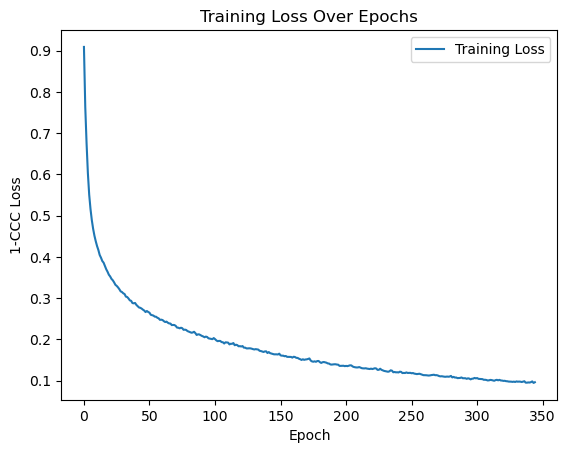

In [96]:
import matplotlib.pyplot as plt
# Plot the training loss values
plt.plot(train_loss_values, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('1-CCC Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

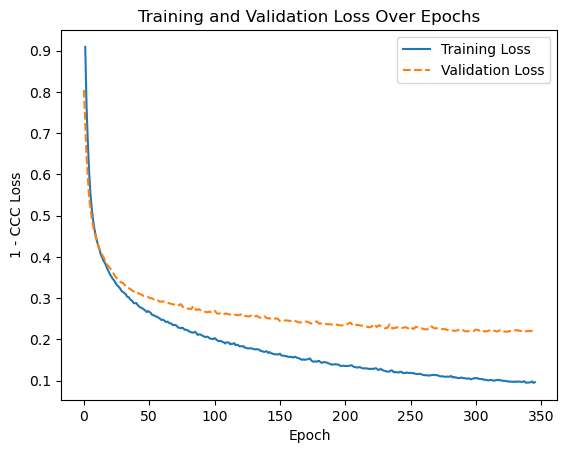

In [97]:
# Plot the training and validation loss values
epochs = range(1, len(train_loss_values) + 1)
plt.plot(epochs, train_loss_values, label='Training Loss')
plt.plot(range(0, len(validation_loss_values) * validate_every, validate_every), validation_loss_values, label='Validation Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('1 - CCC Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [98]:
features2 = df_devel_feat.values.astype(np.float32)
#labels2   = df_devel_arousal_lab['arousal'].values.astype(np.float32)
labels2   = df_devel_valence_lab['valence'].values.astype(np.float32)

# Normalize the features between -1 and 1 (adjust scaling based on your data)
# features2 = (features - np.min(features)) / (np.max(features) - np.min(features)) * 2 - 1

# Convert data to PyTorch tensors
features_tensor2 = torch.from_numpy(features2)
labels_tensor2   = torch.from_numpy(labels2)

######
# Reshape features tensor with sequence length of 50
sequence_length = 1
num_features = features2.shape[1]
num_samples  = features2.shape[0]

# Calculate the number of sequences that can be formed
num_sequences = num_samples // sequence_length

# Truncate the tensor to fit the full sequences
features_tensor2 = features_tensor2[:num_sequences * sequence_length, :]
labels_tensor2   = labels_tensor2[:num_sequences * sequence_length]

# Reshape the tensor
features_tensor2 = features_tensor2.view(num_sequences, sequence_length, num_features)
######

In [99]:
features_tensor2.size()

torch.Size([67509, 1, 768])

In [100]:
# Load the best model for testing

#best_model = ConvGRUModel(input_size, hidden_size, num_layers, output_size, dropout_prob)
best_model = ConvBLSTMModel(input_size, hidden_size, num_layers, output_size, dropout_prob)

best_model.load_state_dict(torch.load(best_model_path))
best_model.to(device)

with torch.no_grad():
    test_outputs = best_model(features_tensor2.to(device))
    test_loss    = criterion(test_outputs, labels_tensor2.unsqueeze(1).to(device))

print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 0.7729


In [101]:
test_outputs

tensor([[-0.1354],
        [-0.0707],
        [-0.0424],
        ...,
        [ 0.0673],
        [ 0.0908],
        [ 0.0780]], device='cuda:1')

### Arousal

#### Smooth function to smooth predictions

In [102]:
from pandas import DataFrame
from pandas import concat

def F_Smooth(prediction, win_width):

    df_pred = pd.DataFrame(prediction)
    width = win_width
    lag1 = df_pred.shift(1)
    lag3 = df_pred.shift(width - 1)
    window = lag3.rolling(window=width)
    means = window.mean()
    df_smoothed = concat([means, lag1, df_pred], axis=1)
    df_smoothed.columns = ['mean', 't-1', 't+1']
    df_smoothed['mean'] = df_smoothed['mean'].fillna(df_smoothed['t+1'])
    
    return df_smoothed['mean']

#### Predict on Devel set

In [103]:
predict_y_devel_arousal = test_outputs.cpu().squeeze(1)

In [104]:
predict_y_devel_arousal.shape

torch.Size([67509])

In [105]:
import audmetric

print("CCC = " + str(audmetric.concordance_cc(df_devel_arousal_lab['arousal'], predict_y_devel_arousal)))
print("MSE = " + str(audmetric.mean_absolute_error(df_devel_arousal_lab['arousal'], predict_y_devel_arousal)))
print("MAE = " + str(audmetric.mean_squared_error(df_devel_arousal_lab['arousal'], predict_y_devel_arousal)))

CCC = 0.18401994959202292
MSE = 0.19694324225515006
MAE = 0.060682622126837484


In [106]:
print("CCC = " + str(audmetric.concordance_cc(df_devel_arousal_lab['arousal'], F_Smooth(predict_y_devel_arousal, 5))))
print("CCC = " + str(audmetric.concordance_cc(df_devel_arousal_lab['arousal'], F_Smooth(predict_y_devel_arousal, 10))))
print("CCC = " + str(audmetric.concordance_cc(df_devel_arousal_lab['arousal'], F_Smooth(predict_y_devel_arousal, 15))))
print("CCC = " + str(audmetric.concordance_cc(df_devel_arousal_lab['arousal'], F_Smooth(predict_y_devel_arousal, 20))))
print("CCC = " + str(audmetric.concordance_cc(df_devel_arousal_lab['arousal'], F_Smooth(predict_y_devel_arousal, 25))))
print("CCC = " + str(audmetric.concordance_cc(df_devel_arousal_lab['arousal'], F_Smooth(predict_y_devel_arousal, 30))))
print("CCC = " + str(audmetric.concordance_cc(df_devel_arousal_lab['arousal'], F_Smooth(predict_y_devel_arousal, 35))))
print("CCC = " + str(audmetric.concordance_cc(df_devel_arousal_lab['arousal'], F_Smooth(predict_y_devel_arousal, 40))))

print("MSE = " + str(audmetric.mean_absolute_error(df_devel_arousal_lab['arousal'], F_Smooth(predict_y_devel_arousal, 20))))
print("MAE = " + str(audmetric.mean_squared_error(df_devel_arousal_lab['arousal'], F_Smooth(predict_y_devel_arousal, 20))))

CCC = 0.19117837785430494
CCC = 0.1908524668140755
CCC = 0.18808731154659486
CCC = 0.1849884364542293
CCC = 0.18209292373628916
CCC = 0.17939961246322747
CCC = 0.17683587407752765
CCC = 0.1743835599031937
MSE = 0.1885799480567404
MAE = 0.056736722796287505


### Valence

In [107]:
predict_y_devel_valence = test_outputs.cpu().squeeze(1)

In [108]:
predict_y_devel_valence.shape

torch.Size([67509])

In [109]:
import audmetric

print("CCC = " + str(audmetric.concordance_cc(df_devel_valence_lab['valence'], predict_y_devel_valence)))
print("MSE = " + str(audmetric.mean_absolute_error(df_devel_valence_lab['valence'], predict_y_devel_valence)))
print("MAE = " + str(audmetric.mean_squared_error(df_devel_valence_lab['valence'], predict_y_devel_valence)))

CCC = 0.22710824421963782
MSE = 0.1156504726241241
MAE = 0.02295047602698187


In [110]:
print("CCC = " + str(audmetric.concordance_cc(df_devel_valence_lab['valence'], F_Smooth(predict_y_devel_valence, 5))))
print("CCC = " + str(audmetric.concordance_cc(df_devel_valence_lab['valence'], F_Smooth(predict_y_devel_valence, 10))))
print("CCC = " + str(audmetric.concordance_cc(df_devel_valence_lab['valence'], F_Smooth(predict_y_devel_valence, 15))))
print("CCC = " + str(audmetric.concordance_cc(df_devel_valence_lab['valence'], F_Smooth(predict_y_devel_valence, 20))))
print("CCC = " + str(audmetric.concordance_cc(df_devel_valence_lab['valence'], F_Smooth(predict_y_devel_valence, 25))))
print("CCC = " + str(audmetric.concordance_cc(df_devel_valence_lab['valence'], F_Smooth(predict_y_devel_valence, 30))))
print("CCC = " + str(audmetric.concordance_cc(df_devel_valence_lab['valence'], F_Smooth(predict_y_devel_valence, 35))))
print("CCC = " + str(audmetric.concordance_cc(df_devel_valence_lab['valence'], F_Smooth(predict_y_devel_valence, 40))))
print("CCC = " + str(audmetric.concordance_cc(df_devel_valence_lab['valence'], F_Smooth(predict_y_devel_valence, 45))))
print("CCC = " + str(audmetric.concordance_cc(df_devel_valence_lab['valence'], F_Smooth(predict_y_devel_valence, 50))))

print("MSE = " + str(audmetric.mean_absolute_error(df_devel_valence_lab['valence'], F_Smooth(predict_y_devel_valence, 25))))
print("MAE = " + str(audmetric.mean_squared_error(df_devel_valence_lab['valence'], F_Smooth(predict_y_devel_valence, 25))))

CCC = 0.25796023752566205
CCC = 0.27051027693884905
CCC = 0.2766875733006254
CCC = 0.2793994127636239
CCC = 0.2800282955538359
CCC = 0.2791549609852357
CCC = 0.27727525745757964
CCC = 0.274619646820398
CCC = 0.27128722687458356
CCC = 0.26751172155213526
MSE = 0.10194474237257373
MAE = 0.017783505961482884


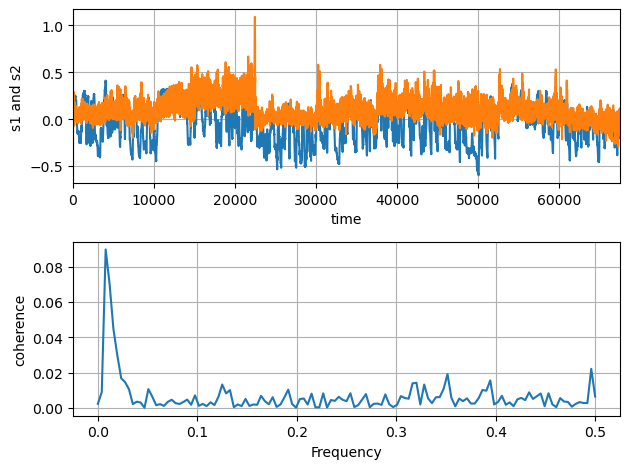

In [111]:
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)
predict_y = F_Smooth(predict_y_devel_arousal, 5)

dt = 1
t = np.arange(0, len(predict_y), dt)
s1 = df_devel_arousal_lab['arousal']
s2 = predict_y                # white noise 2

fig, axs = plt.subplots(2, 1)
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, len(predict_y))
axs[0].set_xlabel('time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('coherence')

fig.tight_layout()
plt.show()

<Figure size 20000x600 with 0 Axes>

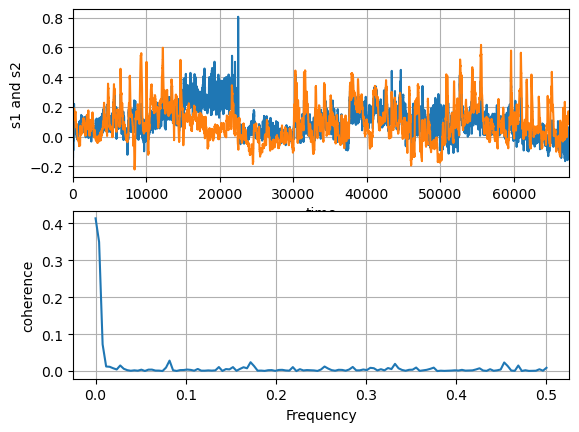

In [112]:
# Fixing random state for reproducibility
np.random.seed(19680801)

plt.figure(figsize=(200,6))
#fig.tight_layout()

predict_y = F_Smooth(predict_y_devel_valence, 20)

dt = 1
t = np.arange(0, len(predict_y), dt)
s1 = df_devel_valence_lab['valence']
s2 = predict_y               # white noise 2

fig, axs = plt.subplots(2, 1)
axs[0].plot(t, s2, t, s1)
axs[0].set_xlim(0, len(predict_y))
axs[0].set_xlabel('time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('coherence')

#plt.figure(figsize=(20,6))
#fig.tight_layout()
plt.show()